## Decision Tree

Import statements

In [82]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
import warnings
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#not using atm
# from sklearn.tree import DecisionTreeRegressor, export_graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Reading in our feature set

In [83]:
feature_set = pd.read_pickle("feature_set.pkl")
feature_set.head(3)

,max_temp,precip,amount,day_of_week,hour_of_the_day,month
hour_from_zero,,,,,,
1,15.6,0,19,1,1,1
2,15.0,0,8,1,2,1
3,15.0,0,16,1,3,1


Try different depths in order to get the best fit using r^2

In [84]:
depths = [None, 2,3,4,5,6,7,8,9,10,15,20,25, 50, 100]
scores_mean = []

In [85]:
for depth_ in depths:
    regressor = DecisionTreeRegressor(max_depth = depth_)
# regressor.fit(weather_demand_final[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
#               weather_demand_final['amount'])


    regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])
    
    scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring='r2', cv=10)
    scores_mean.append((depth_, scores.mean()))
    #print(depth_, scores.mean())


In [86]:
scores_mean

[(None, 0.5251614583941009),
 (2, 0.5023946391865002),
 (3, 0.5748985691407528),
 (4, 0.6240718717376872),
 (5, 0.6585424627015103),
 (6, 0.6716115096854678),
 (7, 0.6741891359863934),
 (8, 0.6750265490291643),
 (9, 0.6620748984300651),
 (10, 0.6238294916045962),
 (15, 0.5241001613031476),
 (20, 0.5255839457305723),
 (25, 0.5190481509114138),
 (50, 0.5141185416311842),
 (100, 0.5162314523903555)]

Plot the r^2 values for different depths

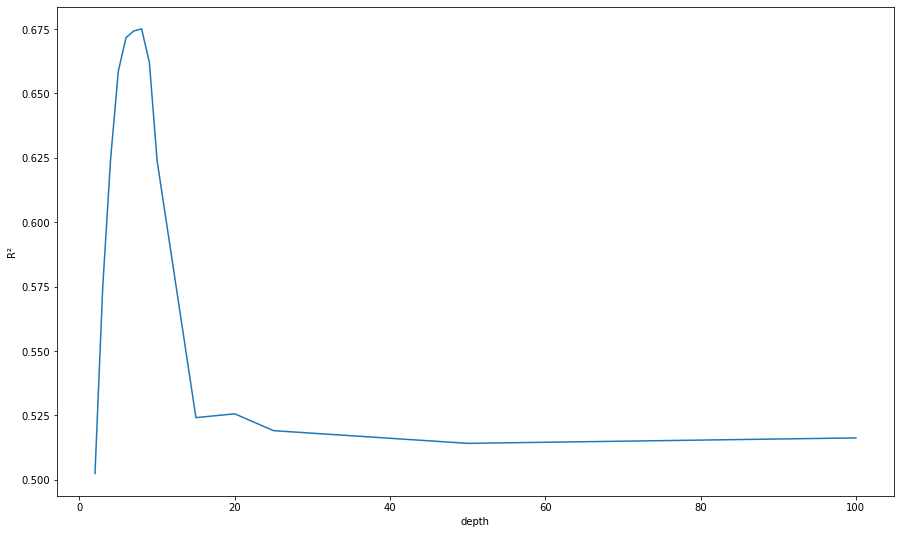

In [87]:
#plotting depths and R² 
fig, ax = plt.subplots(figsize = (15,9))
x,y = zip(*scores_mean)

ax.plot(x,y)
ax.set_xlabel("depth")
ax.set_ylabel("R²")

plt.show()

Search for best depth

In [88]:
max(scores_mean ,key=lambda item:item[1])

(8, 0.6750265490291643)

Using depth = 8, trying different number of splits

In [89]:
regressor = DecisionTreeRegressor(max_depth=8)
regressor

DecisionTreeRegressor(max_depth=8)

In [90]:
number_of_splits = []
for i in range (2,15):
    number_of_splits.append(i)

In [91]:
scores_mean = []
for num in number_of_splits:
    scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 
                                                                'hour_of_the_day', 'month']], 
                              feature_set['amount'], scoring = 'r2', cv= num)
    scores_mean.append((num, scores.mean()))
# scores_mean

plot r^2 values for different numbers of splits

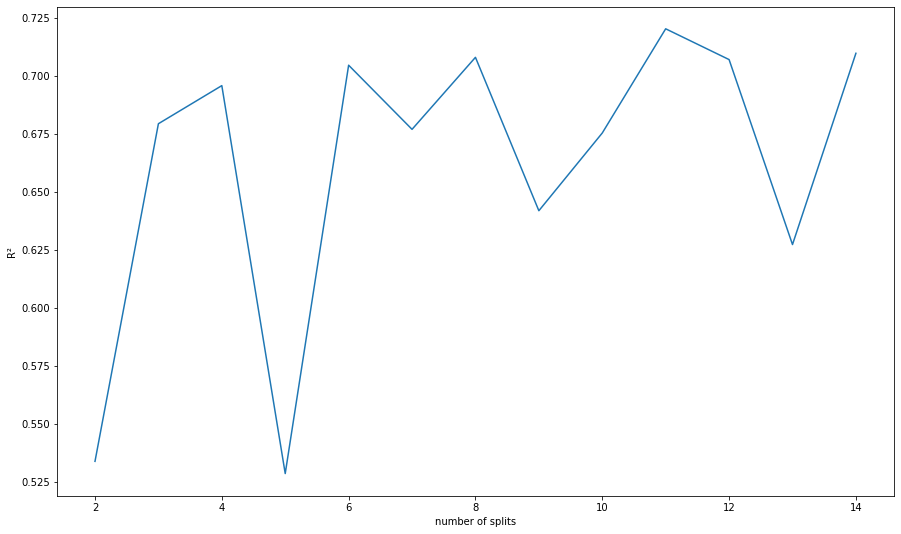

In [92]:
#plotting depths and R² 
fig, ax = plt.subplots(figsize = (15,9))
x,y = zip(*scores_mean)

ax.plot(x,y)
ax.set_xlabel("number of splits")
ax.set_ylabel("R²")

plt.show()

In [93]:
print("Number of Splits, R²:", max(scores_mean ,key=lambda item:item[1]))

Number of Splits, R²: (11, 0.7201538048607066)


Search for best combination of splits and depth to check if it's the same as it was when we searched for best values seperately

In [94]:
scores_mean2 = []
for depth_ in depths:
    for num in number_of_splits:
        regressor = DecisionTreeRegressor(max_depth = depth_)
        regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])
    
        scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring='r2', cv=num)
        scores_mean2.append((depth_, num, scores.mean()))
        

In [95]:
print("Depth, Number of Splits, R²:", max(scores_mean2 ,key=lambda item:item[2]))

Depth, Number of Splits, R²: (8, 11, 0.7198439768456422)


Best combination depth 8, number of splits 11

Get different scores (MAE, MSE, RMSE)

In [96]:
scorers = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

In [97]:
regressor = DecisionTreeRegressor(max_depth=8)
for scorer in scorers:
    scores = -cross_val_score(regressor,feature_set[['max_temp', 'precip', 'day_of_week', 
                                                            'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring = scorer, cv=11)
    print(scorer)
    print(scores)
    print("mean:", scores.mean())
    print("")

neg_mean_absolute_error
[ 8.65086794  8.26438437  5.78477756  5.85253457  6.55987838  7.33209867
  7.94614254  8.3271854   9.42120501 10.9612852  10.87616278]
mean: 8.179683854089886

neg_mean_squared_error
[168.94782758 165.90537236  62.8995268   70.15405584  86.31969736
 107.9363979  137.67299807 135.14496721 444.18601875 264.54324438
 274.72882957]
mean: 174.40353961969896

neg_root_mean_squared_error
[12.9965397  12.88042594  7.93092219  8.3758018   9.29083943 10.38924434
 11.72981183 11.62518676 21.07572107 16.26478541 16.42192587]
mean: 12.634654940726211



Finetuning of hyperparameters

In [98]:
# min_samples_split: int, float, optional (default=2)
# The minimum number of samples required to split an internal node
sp = [2,3,4,5,6,7,8,9,10]
scores_mean = []

In [99]:
for sp_ in sp:    
    regressor = DecisionTreeRegressor(max_depth=8, min_samples_split = sp_)
    regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])
    scores = cross_val_score(regressor, feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                             feature_set['amount'], scoring='r2', cv=11)
    scores_mean.append((sp_, scores.mean()))

In [100]:
print("min_sample_split, R²", max(scores_mean ,key=lambda item:item[1]))

min_sample_split, R² (8, 0.7205301697219935)


In [101]:
regressor = DecisionTreeRegressor(max_depth=8, min_samples_split = 8)
regressor.fit(feature_set[['max_temp', 'precip', 'day_of_week', 'hour_of_the_day', 'month']], 
                  feature_set['amount'])

DecisionTreeRegressor(max_depth=8, min_samples_split=8)

In [102]:
#create a list for our final scores
final_values = []
# add r^2 value to final_values
final_values.append((max(scores_mean ,key=lambda item:item[1]))[1])

In [103]:
for scorer in scorers:
    scores = -cross_val_score(regressor,feature_set[['max_temp', 'precip', 'day_of_week', 
                                                            'hour_of_the_day', 'month']], 
                          feature_set['amount'], scoring = scorer, cv=11)
    final_values.append(scores.mean())
    print(scorer)
    print(scores)
    print("mean:", scores.mean(), "\n")

neg_mean_absolute_error
[ 8.61988557  8.22150324  5.8012763   5.83976019  6.57727973  7.3438535
  7.94060098  8.30325593  9.43304071 10.9316509  10.75500142]
mean: 8.160646222508381 

neg_mean_squared_error
[168.298253   163.76384891  63.06531045  70.08198469  86.64548836
 108.48019863 137.50662169 134.94660449 444.26516798 263.489125
 269.91395483]
mean: 173.67786891235122 

neg_root_mean_squared_error
[12.97298165 12.797025    7.94136704  8.37149835  9.30835584 10.41538279
 11.72632175 11.61665203 21.07759872 16.23234811 16.42905825]
mean: 12.626235411709244 



Performs slightly better than with default value on all scorers.

Final Evaluation Values:

In [104]:
print("R²:", round(final_values[0], 4))
print("MAE:", round(final_values[1], 4))
print("MSE:", round(final_values[2], 4))
print("RSME:", round(final_values[3], 4))

R²: 0.7205
MAE: 8.1606
MSE: 173.6779
RSME: 12.6262


Try some predictions for new instances

In [105]:
# temp,precip,day of week, hour of the day, month
Xnew = np.array([[28,0,4,20,7]]) #predict peak demand at 28deg c, no rain, thursday, 8p.m., june
print("Predicted amount:", regressor.predict(Xnew))

Predicted amount: [60.83636364]


In [106]:
Xnew = np.array([[15,0,4,20,1]]) #predict peak demand at 15deg c, no rain, friday, 8p.m., january
print("Predicted amount:", regressor.predict(Xnew))

Predicted amount: [24.14285714]
